<a href="https://colab.research.google.com/github/rmonro12/Intro_to_ML/blob/main/Homework_Assignments/HW_4/Problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ryan Monroe (801219572) - 10/28/2025 <br>
ECGR 4105 - Homework 4, Problem 1

###Import Libraries & Prepare dataset

In [ ]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import load_breast_cancer #Import dataset from sklearn
from sklearn import svm

In [ ]:
#Import dataset, manipulate into useful dataframe
cancer = load_breast_cancer()
cancer_data = cancer.data #assign X values
cancer_input = pd.DataFrame(cancer_data)
cancer_labels = cancer.target #assign Y values
labels = np.reshape(cancer_labels,(569,1))
final_cancer_data = np.concatenate([cancer_data,labels],axis=1)

#Convert to data frame
cancer_dataset = pd.DataFrame(final_cancer_data)

#Configure feature labels
features = cancer.feature_names
features_labels = np.append(features,'label')
cancer_dataset.columns = features_labels

#Convert numeric output to classification
cancer_dataset.replace({'label': {0: 'Benign', 1: 'Malignant'}}, inplace=True)

#cancer_dataset.tail() #print tail since it shows benign and malignant

In [ ]:
#Assign input and output variables
X = cancer_dataset.iloc[:, 0:30].values #input
Y = cancer_dataset.iloc[:, 30].values #output
#print(Y[560:]) #ensure data was assigned correctly

In [ ]:
#Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.80, random_state = 0)

In [ ]:
#Feature scaling (normalization)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

###Create SVM Classifier & Train

In [ ]:
#SVM already imported from sklearn
classifier = svm.SVC(kernel="rbf") #try linear, poly, rbf

#Train model using new classifier
classifier.fit(X_train, Y_train)

#Predict accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X_train, Y_train, cv=5)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.9731 (+/- 0.0723)


In [ ]:
#Obtain predictions from trained model
Y_pred = classifier.predict(X_test) #based on eval dataset
print("Predicted values: ", Y_pred[:6])
print("Actual values:    ", Y_test[:6]) #compare predicted values to actual values

Predicted values:  ['Benign' 'Malignant' 'Malignant' 'Malignant' 'Malignant' 'Malignant']
Actual values:     ['Benign' 'Malignant' 'Malignant' 'Malignant' 'Malignant' 'Malignant']


###View Results

In [ ]:
#Dive deeper into performance characteristics
from sklearn import metrics
acc = metrics.accuracy_score(Y_test, Y_pred)
pre = metrics.precision_score(Y_test, Y_pred, pos_label='Malignant')
rec = metrics.recall_score(Y_test, Y_pred, pos_label='Malignant')
F1 = metrics.f1_score(Y_test, Y_pred, pos_label='Malignant')

print(f"Accuracy:  {acc:.3f}")
print(f"Precision:  {pre:.3f}")
print(f"Recall:  {rec:.3f}")
print(f"F1 Score:  {F1:.3f}")

Accuracy:  0.958
Precision:  0.950
Recall:  0.986
F1 Score:  0.968


Text(0.5, 427.9555555555555, 'Predicted label')

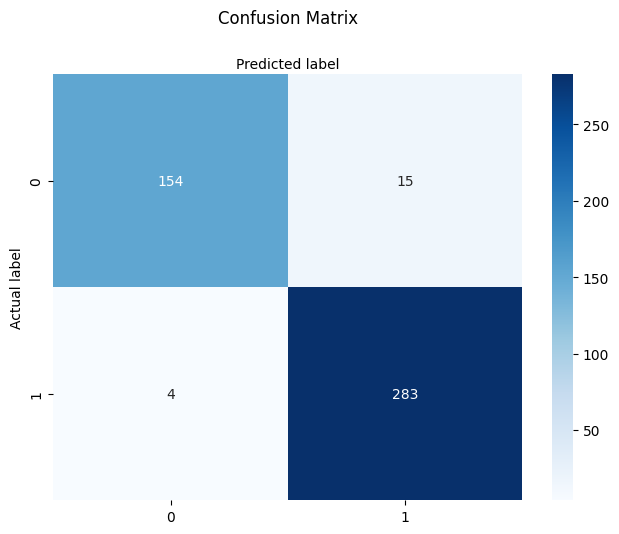

In [ ]:
#Construct confusion matrix to assess model performance
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred) #'cm' = confusion matrix

#Visualize confusion matrix
import seaborn as sns
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Apply heatmap
sns.heatmap(pd.DataFrame(cm), annot = True, cmap = "Blues", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix", y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')